In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sprawl
from sprawl import plotting, utils

import glob
import os

In [4]:
#get gene-ont paths for reading in (read in SPRAWL data for all genes not just Flt1)
mop_real_paths = glob.glob('../../nf_pipeline/outputs/BICCN_20220601_direct/gene_ont/*.csv')
vzbrain_real_paths = glob.glob('../../nf_pipeline/outputs/vz_Brainmap_20220602_direct/gene_ont/*.csv')
vzliver_real_paths = glob.glob('../../nf_pipeline/outputs/vz_Liver_20220601_direct/gene_ont/*.csv')

gene_ont_paths = mop_real_paths+vzbrain_real_paths+vzliver_real_paths
gene_ont_df = pd.concat(pd.read_csv(p) for p in gene_ont_paths)


#Create dataset/replicate columns
experiment_to_dataset = {
    'BICCN_mouse1':'BICCN',
    'BICCN_mouse2':'BICCN',
    'vz_Brainmap_slice1':'vz_Brain',
    'vz_Brainmap_slice2':'vz_Brain',
    'vz_Liver_mouse1':'vz_Liver',
    'vz_Liver_mouse2':'vz_Liver',
}

experiment_to_replicate = {
    'BICCN_mouse1':'Replicate 1',
    'BICCN_mouse2':'Replicate 2',
    'vz_Brainmap_slice1':'Replicate 1',
    'vz_Brainmap_slice2':'Replicate 2',
    'vz_Liver_mouse1':'Replicate 1',
    'vz_Liver_mouse2':'Replicate 2',
}

gene_ont_df = (gene_ont_df
      .assign(dataset = gene_ont_df['experiment'].map(experiment_to_dataset))
      .assign(replicate = gene_ont_df['experiment'].map(experiment_to_replicate))
)
gene_ont_df['Significance'] = np.where(gene_ont_df['bh_p'].le(0.05),'Significant','Insignificant')
gene_ont_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,dataset,replicate,Significance
0,BICCN_mouse1,m1s1,puncta,1700022I11Rik,L23_IT,58,2.0,610.5,0.213,1.853517,0.063808,0.077515,BICCN,Replicate 1,Insignificant
1,BICCN_mouse1,m1s1,puncta,1700022I11Rik,L5_IT,40,2.0,790.0,0.274,2.588688,0.009634,0.012967,BICCN,Replicate 1,Significant
2,BICCN_mouse1,m1s1,puncta,1700022I11Rik,L6_IT,23,2.0,765.0,0.714,4.245858,0.000022,0.000041,BICCN,Replicate 1,Significant
3,BICCN_mouse1,m1s1,puncta,1810046K07Rik,L23_IT,627,2.0,642.0,0.340,11.957061,0.000000,0.000000,BICCN,Replicate 1,Significant
4,BICCN_mouse1,m1s1,puncta,1810046K07Rik,L56_NP,23,2.0,612.0,0.308,2.550834,0.010747,0.014395,BICCN,Replicate 1,Significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,vz_Liver_mouse2,m2s1,puncta,Blank-37,12,302,2.0,1734.5,0.034,0.698774,0.484693,0.610451,vz_Liver,Replicate 2,Insignificant
12612,vz_Liver_mouse2,m2s1,puncta,Blank-37,13,52,2.0,869.5,0.093,-0.422796,0.672444,0.769825,vz_Liver,Replicate 2,Insignificant
12613,vz_Liver_mouse2,m2s1,puncta,Blank-37,15,329,2.0,1989.0,-0.044,-0.943464,0.345444,0.474534,vz_Liver,Replicate 2,Insignificant
12614,vz_Liver_mouse2,m2s1,puncta,Blank-37,16,210,2.0,1644.5,0.041,0.399763,0.689331,0.782350,vz_Liver,Replicate 2,Insignificant


In [16]:
#Flt1 is present in BICCN-MOp and Vz Brainmap, but not imaged in Vz Liver (even checked VEGFR pseudonym)
#Flt1 is present in many cell-types and often thousands of cells
#Flt1 is significant in most of the cell-types that it is present in
gene_ont_df[
    gene_ont_df['gene'].eq('Flt1')
].groupby(['experiment','sample','metric','Significance']).agg(
    nunique_cts = ('annotation','nunique'),
    tot_cells = ('num_cells','sum'),
)

nunique_cts  tot_cells
experiment         sample metric  Significance                         
BICCN_mouse1       m1s1   central Insignificant            1       1302
                                  Significant             18      11296
                          periph  Significant             19      12598
                          puncta  Significant             18       6218
                          radial  Significant             18       6218
BICCN_mouse2       m2s1   central Insignificant            3       1150
                                  Significant             15       8585
                          periph  Significant             18       9735
                          puncta  Significant             18       4303
                          radial  Insignificant            1        327
                                  Significant             17       3976
                   m2s2   central Insignificant            1         21
                          periph  Insignificant            1         21
vz_Brainmap_slice1 s1r1   central Insignificant           13        645
                                  Significant             14       1589
                          periph  Insignificant            6        199
                                  Significant             21       2035
                          puncta  Significant              7        887
                          radial  Significant              7        887
vz_Brainmap_slice2 s2r1   central Insignificant           22       1003
                                  Significant             16       1934
                          periph  Insignificant           15        538
                                  Significant             23       2399
                          puncta  Insignificant            1         25
                                  Significant             10        817
                          radial  Significant             11        842
vz_Brainmap_slice3 s3r1   central Insignificant           10        470
                                  Significant             22       2175
                          periph  Insignificant            4        127
                                  Significant             28       2518
                          puncta  Significant              6        940
                          radial  Significant              6        940

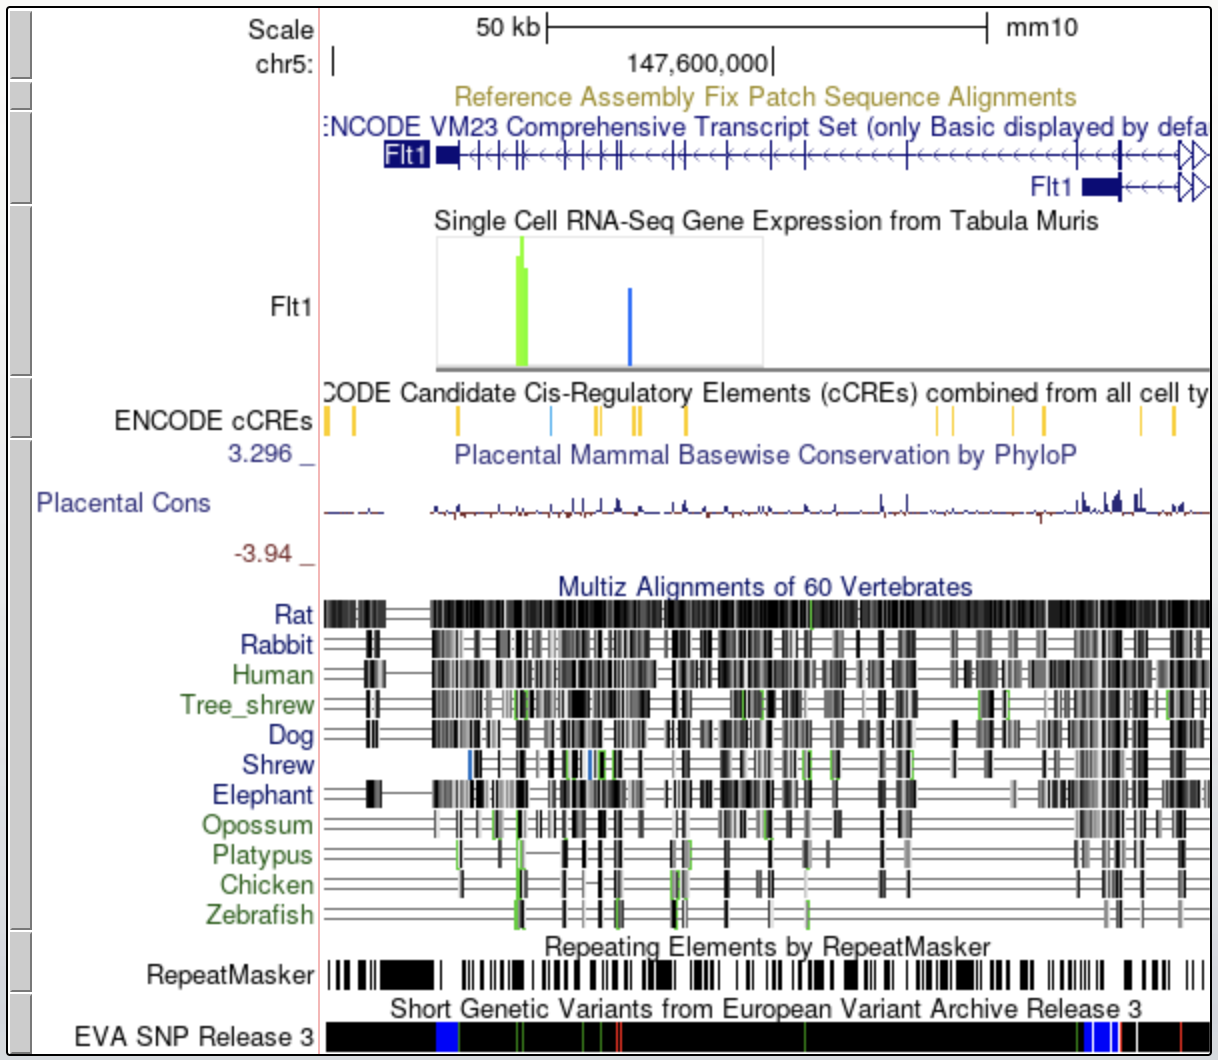

In [18]:
#Here's what the annotated Flt1 locus looks like with the alternative 3' UTRs shown
#https://genome.ucsc.edu/cgi-bin/hgTracks?db=mm10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr5%3A147548976%2D147649584&hgsid=1550131705_aUa8R8WEO1cUkHxqSoRmWSf7la5P
#Flt1 is expressed in endothelial cells according to UCSC (green and blue barplot)
from IPython.display import Image
Image(filename='flt1_alternate_annotated_3UTR.png') 

In [37]:
#Do different cell-types utilize different annotated Flt1 3' UTRs in the 10X datasets?
#testing by simply counting the number of reads in the long and short annotated 3' UTRs above

#Very sparse amount of reads in either 3' UTR, counts are mainly coming from Endothelial cells as expected
bam_path = '../../inputs/BICCN_10Xv3_scRNAseq.bam' #aligned to mm10

loci = {
    'short_3UTR':('chr5',147635073,147639142),
    'long_3UTR':('chr5',147561435,147564419),
}
strand = '-'

#Get the reads mapping to either the long and short 3' UTRs stratified by cell-type
pos_df = pd.DataFrame()
for size,locus in loci.items():
    locus_df = utils.bam_read_positions(
        bam_path,
        locus = locus,
        strand = strand, #select only reads on this specific strand
        stratify_tag = ['XO','RG'],
    ).assign(UTR=size)
    
    pos_df = pd.concat((pos_df,locus_df))

# create cell-type (ct) and cell-id columns by splitting the strat column
pos_df[['ct','cell_id']] = pos_df['strat'].tolist()

count_df = pos_df.groupby(['ct','UTR']).agg(
    num_reads = ('pos','count'),
    nunique_cells = ('cell_id','nunique'),
)

count_df


num_reads  nunique_cells
ct          UTR                                 
Astro       long_3UTR           4              1
            short_3UTR          3              1
Endo        long_3UTR        1847              5
            short_3UTR       1258              5
L23_IT      long_3UTR          49              4
            short_3UTR         31              4
L56_NP      long_3UTR          24              4
            short_3UTR          9              2
L5_ET       long_3UTR          14              1
            short_3UTR          7              1
L5_IT       long_3UTR          69              6
            short_3UTR         39              5
L6_CT       long_3UTR          58              6
            short_3UTR         20              4
L6_IT       long_3UTR          21              4
            short_3UTR          9              3
L6b         long_3UTR           9              3
            short_3UTR          1              1
Lamp5       long_3UTR          19              5
            short_3UTR         22              4
Low_Quality long_3UTR         140              6
            short_3UTR         70              5
Oligo       long_3UTR           1              1
            short_3UTR          1              1
Pvalb       long_3UTR          35              2
            short_3UTR         17              2
SMC         short_3UTR          1              1
Sst         long_3UTR          11              6
            short_3UTR          2              2
VLMC        long_3UTR          11              2
            short_3UTR          5              2
Vip         long_3UTR          19              2
            short_3UTR         11              2
doublet     long_3UTR        1418              5
            short_3UTR        849              5

In [41]:
#is there a significant difference in long/short and L5-IT vs. Endothelial?
#chose these celltypes since they had the highest counts ignoring 'doublet'
#use fischer's exact test

#no it is not significant
from scipy.stats import fisher_exact

Endo_short = count_df.loc[('Endo','short_3UTR')]['num_reads']
Endo_long = count_df.loc[('Endo','long_3UTR')]['num_reads']

L5_IT_short = count_df.loc[('L5_IT','short_3UTR')]['num_reads']
L5_IT_long = count_df.loc[('L5_IT','long_3UTR')]['num_reads']


s,p = fisher_exact([[Endo_short,Endo_long],[L5_IT_short,L5_IT_long]])
print(f'Fisher statistic: {s}, with p {p}')

Fisher statistic: 1.205031027445754, with p 0.3714113497504487
